# Test sampleo dataset completo

In [ ]:
import numpy as np
import meshplot as mp
from training.dataset import PointCloud
import matplotlib.pyplot as plt

In [ ]:
pc = PointCloud( '../results/juguete_hd/juguete_hd.json', 60000, 1,[0.1, 0.1, 0.8], [0.3, 0.95])

In [ ]:
samples, normals, sdf, curvature = next(iter(pc))
distance = np.array(samples.detach().cpu())[:, 0]
coords = np.array(samples.detach().cpu())[:, 1:]
sdf = np.array(sdf.detach().cpu()).flatten()
curvature = np.array(curvature.detach().cpu()).flatten()
submesh = np.ones_like(distance) * 0
mp.plot( coords[np.isclose(distance, submesh).flatten()], c= sdf[np.isclose(distance, submesh).flatten()], shading={'point_size':0.1, 'colormap':'turbo'} )

# Test superficie

In [ ]:
mp.plot( coords[np.isclose(sdf, submesh).flatten()], c= curvature[np.isclose(sdf, submesh).flatten()], shading={'point_size':0.1, 'colormap':'turbo'} )

a ver si hacemos un analisis un poquito más piola...

In [ ]:
configuraciones = [
    [ [0.3, 0.3, 0.4], [0.3, 0.6] ], # super equilibrada
    [ [0.1, 0.8, 0.1], [0.5, 0.9]], # con enfoque en las de curvatura media
    [ [0.1, 0.1, 0.8], [0.5, 0.9]] # con enfoque en curvatura alta
]

curvaturas = []
puntos = []
for fractions, bins in configuraciones:
    pc = PointCloud( '../results/juguete_hd/juguete_hd.json', 300, 2,fractions, bins)
    c = []
    p = []
    for samples, normals, sdf, curvature in iter(pc):
        distance = np.array(samples.detach().cpu())[:, 0]
        coords = np.array(samples.detach().cpu())[:, 1:]
        sdf = np.array(sdf.detach().cpu()).flatten()
        curvature = np.array(curvature.detach().cpu()).flatten()
        submesh = np.ones_like(distance) * 0

        if len(c) == 0:
            p = coords[np.isclose(sdf, submesh).flatten()]
            c = curvature[np.isclose(sdf, submesh).flatten()]
        else:
            c = np.concatenate( [c, curvature[np.isclose(sdf, submesh).flatten()]])
            p = np.concatenate( [p, coords[np.isclose(sdf, submesh).flatten()]])

    curvaturas.append(c)
    puntos.append(p)

In [ ]:
bins = np.linspace( np.min(curvaturas), np.max(curvaturas), 20)
plt.hist( curvaturas[0],density=True, bins=bins,alpha=0.5, label='conf0')
plt.hist( curvaturas[1],density=True, bins=bins,alpha=0.5, label='conf1')
plt.hist( curvaturas[2],density=True, bins=bins,alpha=0.5, label='conf2')
plt.legend(loc='upper right')
plt.show()

In [ ]:
mp.plot( puntos[2], c= curvaturas[2], shading={'point_size':0.05, 'colormap':'turbo'} )

# Test full - dataset

In [1]:
import numpy as np
import meshplot as mp
from training.dataset import PointCloud
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import open3d as o3d
import json

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
pc = PointCloud( '../results/faust_54098/faust_54098.json', 116000, 1,[0.1, 0.1, 0.8], [0.3, 0.95])
print( len(pc.meshes) )

Loading meshes "../results/faust_54098/faust_54098.json".
Fetching 58000 on-surface points per iteration.
Creating point-cloud and acceleration structures.
58


In [4]:
samples, normals, sdf, curvature = next(iter(pc))
distance = np.array(samples.detach().cpu())[:, 0:pc.features]
coords = np.array(samples.detach().cpu())[:, pc.features:]
sdf = np.array(sdf.detach().cpu()).flatten()
curvature = np.array(curvature.detach().cpu()).flatten()

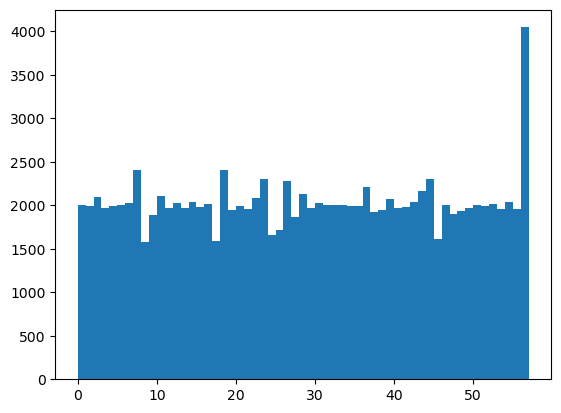

In [5]:
means = []
meshes = []
with open('../results/faust_54098/faust_54098.json') as jsonFile:
    data = json.load( jsonFile )

    for joint in data['joints']:
        means.append( joint['mean'])
        meshes.append( o3d.geometry.TriangleMesh( 
            o3d.utility.Vector3dVector(np.asarray(joint['vertices'])), 
            o3d.utility.Vector3iVector(np.asarray(joint['triangles'])) ) )
            
treeOfMeans = KDTree( means )
_, jointIdx = treeOfMeans.query( distance, k=1 )

plt.figure(0)
bins = np.arange( 0, len(meshes))
plt.hist( jointIdx,bins=bins)
plt.show()


In [11]:
submesh = 57
if submesh not in jointIdx:
    print(f'La submalla {submesh} no fue sampleada nunca')
else:
    mp.plot( coords[jointIdx == submesh], c= sdf[ jointIdx == submesh], shading={'point_size':0.1, 'colormap':'turbo'} )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-9.629130…

In [12]:
mp.plot( np.asarray( meshes[submesh].vertices), np.asarray( meshes[submesh].triangles) )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.022372…